<a href="https://colab.research.google.com/github/hsabaghpour/pytorch-training-playground/blob/main/Basic_NN_creation_on_PyThorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Basic NN on IRIS dataset**


**About Dataset**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/).

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:



**SepalLengthCm**

**SepalWidthCm**

**PetalLengthCm**

**PetalWidthCm**

**Species**

https://www.kaggle.com/datasets/uciml/iris

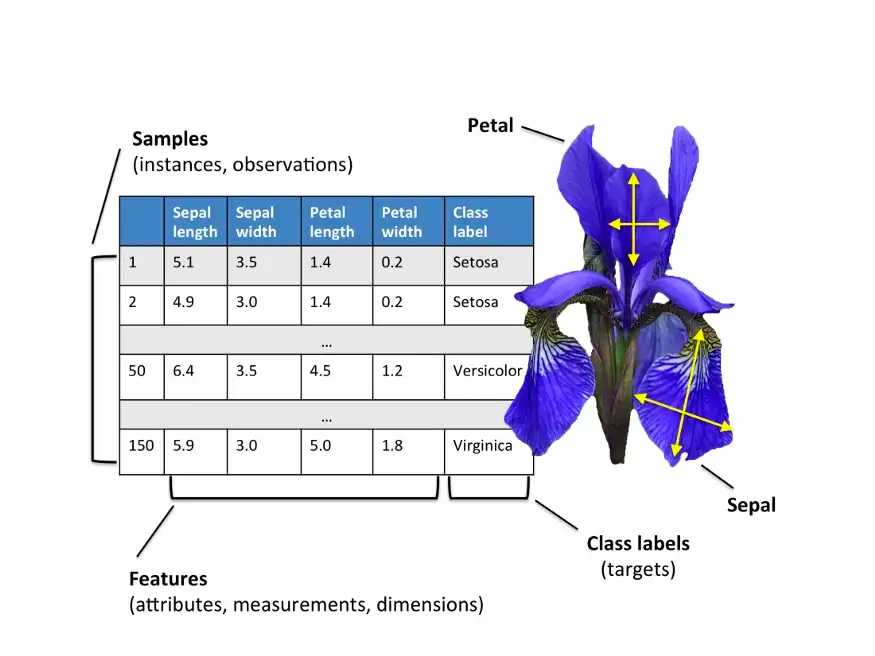

#**Neural Network Diagram**


**A neural network diagram typically consists of:**

Input Layer: Receives the initial data for the model to process. Each neuron in this layer represents a feature of the input data.

**Hidden Layers:** Intermediate layers between the input and output layers where computations are performed. They extract and transform features through multiple layers of neurons.

**Output Layer:** Produces the final result of the neural network, such as classification labels or continuous values.

**Process:**

**Forward Propagation:** Data moves from the input layer through the hidden layers to the output layer.

**Activation Function:** Applied at each hidden and output layer neuron to introduce non-linearity, allowing the network to learn complex patterns. Common functions include **ReLU, Sigmoid, and Tanh**.
This structure allows neural networks to learn and model complex data relationships through layers of abstraction.

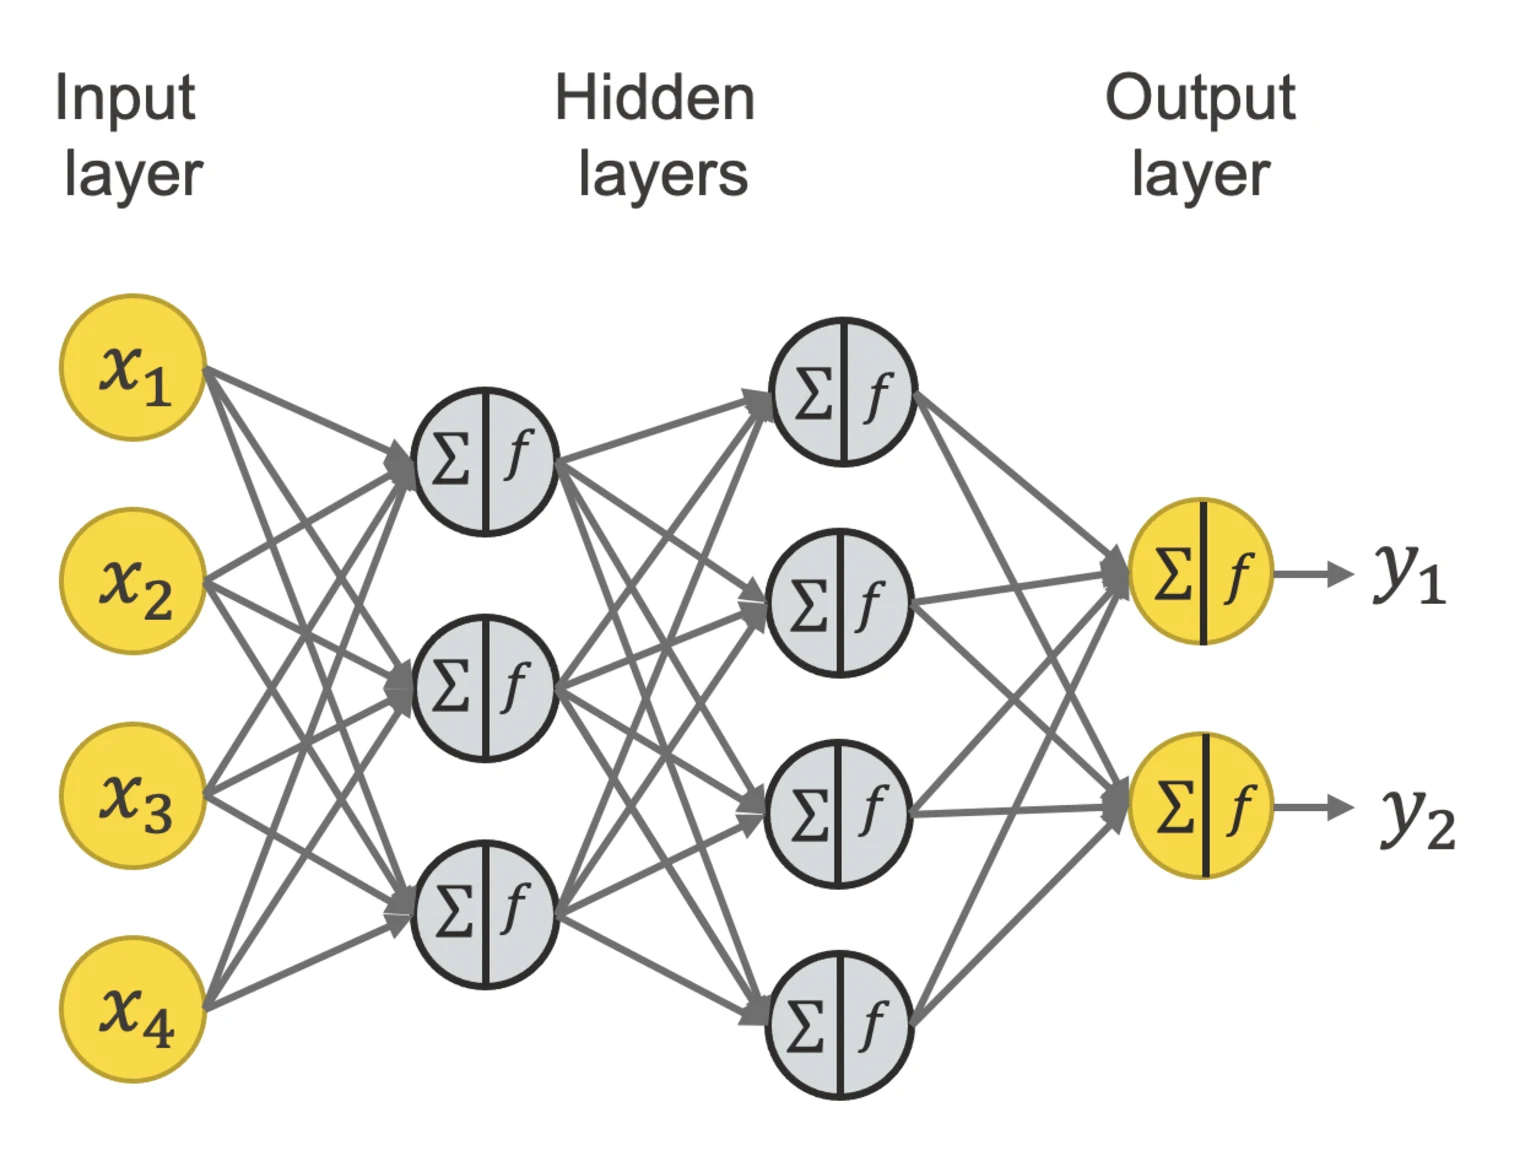


**Backpropagation**


 It is a key algorithm in training neural networks, facilitating the adjustment of model parameters (weights and biases) to minimize prediction errors:


**Error Calculation:** First, the network's output is compared with the desired output to compute the prediction error.


**Gradient Descent:** Error gradients are then propagated backward through the network to compute the contribution of each parameter to the error.



**Parameter Update:** Using the gradients, parameters are adjusted iteratively (using optimization techniques like gradient descent) to reduce errors across the training data.


This iterative process enables neural networks to learn from data, refining their predictions over epochs until convergence, optimizing model performance.

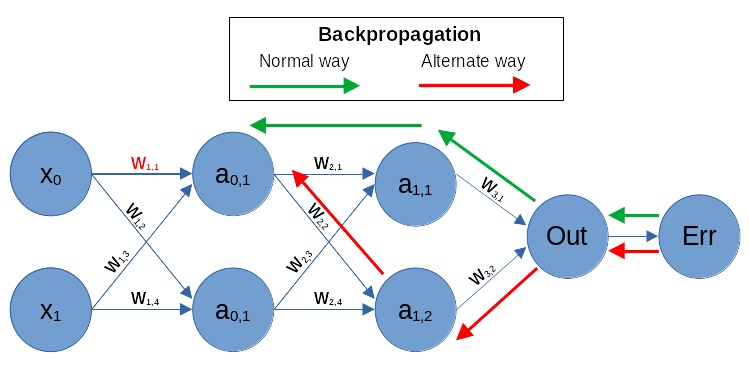

In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#**Activation Functions**


**ReLU** (Rectified Linear Unit) is great for neural networks because:

**Speed:** It's fast to compute.

**Avoids Gradient Problems:** Helps prevent issues with gradients during training.

**Simplicity:** It's straightforward and effective.

**Non-linear:** Allows networks to learn complex patterns.

**Stable Training:** Keeps training stable and efficient.
These qualities make ReLU a popular choice for building neural networks that learn effectively and efficiently.







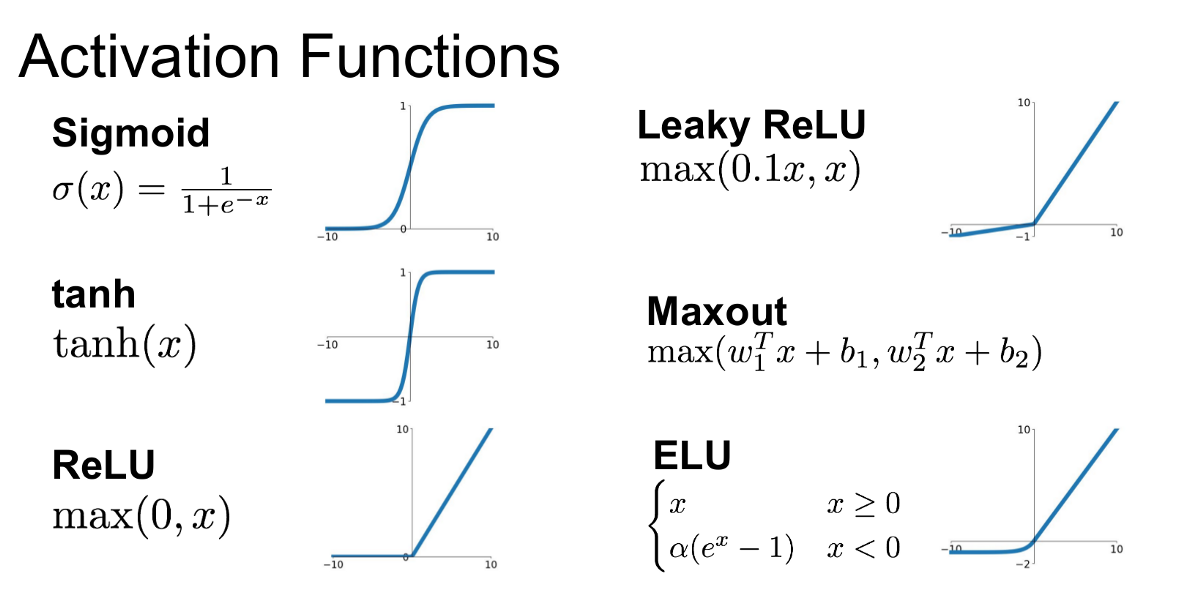

In [2]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
  # Input layer ( 4 features of the flowers) -- > Hidden layer 1 (a set od neurons) -- > Hidden layer 2 (another set of neurons) -- > output layer

  def __init__(self, in_features = 4, h1 = 8 , h2 =9,out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)    #fc stands for "fully connected"
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# Creating a manual seed for randomization!
torch.manual_seed(41)

# Create an instance of model

model = Model()


In [6]:
#loading dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
my_df.shape

(150, 5)

In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
my_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
my_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

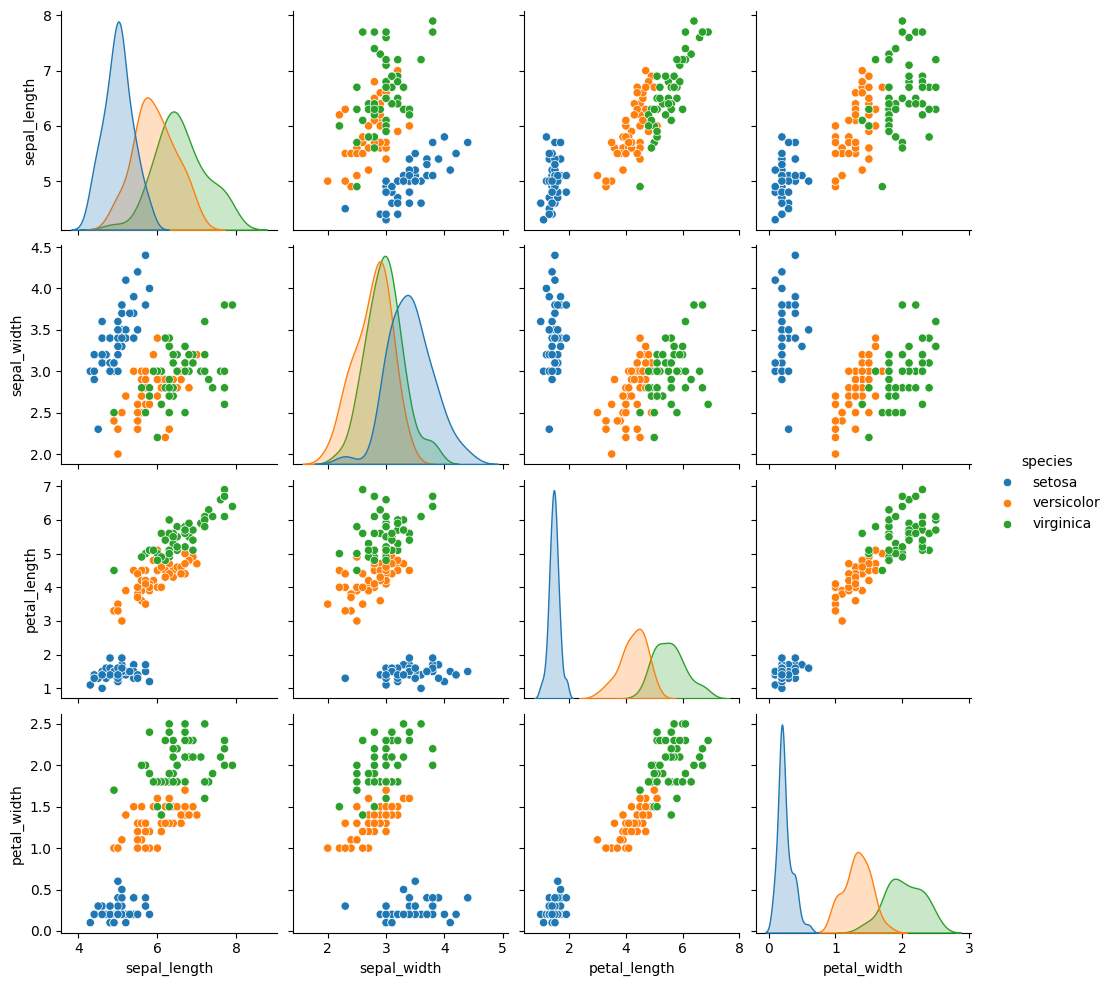

In [15]:
sns.pairplot(my_df,hue='species')

In [24]:

#Change species from str to int

my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

In [25]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
X = my_df.drop('species',axis=1)
y = my_df['species']

In [31]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [43]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: species, dtype: float64

In [44]:
X = X.values
y = y.values

In [49]:
type(X)

numpy.ndarray

In [50]:
type(y)

numpy.ndarray

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [60]:
#convert to tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [62]:
#set the criterion of our model to measure the error

criterion = nn.CrossEntropyLoss()

#choose Optimizer, setting learing rate

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)